# GOALS OF CASE STUDY

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Inserting Libaries

In [1]:
# Importing Libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data

In [2]:
# File Reading
Reading_df = pd.read_csv('Leads.csv')

In [3]:
# Shape of Data
Reading_df.shape

(9240, 37)

In [4]:
# First 5 columns
Reading_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Last 5 columns
Reading_df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [6]:
# Checking Dtypes
Reading_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Numerical Deatils
Reading_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#check the dimensions of data
Reading_df.ndim

2

## Step 3: Cleaning Data

### 3.1 Handling Outliners

In [9]:
## Checking NUll values
Cleaning_df = Reading_df.copy()
Cleaning_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
## Checking Missing values Percentage (%)
Cleaning_df_percent_missing = Cleaning_df.isnull().sum() * 100 / len(Cleaning_df.index)
Cleaning_df_percent_missing.sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

> Dropping columns which have more than percentage of Null Values

In [11]:
# Checking columns more than 40 percent 
Dropping_columns = Cleaning_df.columns[(100 * Cleaning_df.isnull().mean()) > 40]
Dropping_columns

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [12]:
# Dropping columns more than 40 percent
Cleaning_df=Cleaning_df.drop(Dropping_columns,axis=1)

In [13]:
## Checking Missing values Percentage (%) after Dropping
Cleaning_df_percent_missing = Cleaning_df.isnull().sum() * 100 / len(Cleaning_df)

## Filtering values to only see values more than 0
filtered = Cleaning_df_percent_missing[Cleaning_df_percent_missing > 0]
filtered.sort_values(ascending=False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

### A) Checking Tag columns (Missing Percentage= 36.28)

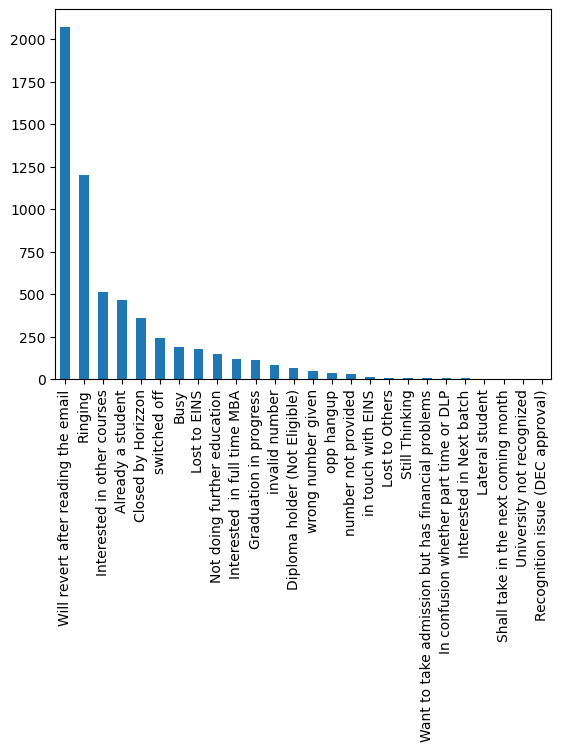

In [14]:
## Checking Tag missing values
tag_counts = Cleaning_df['Tags'].value_counts()
tag_counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

>  Combining infrequent items to Others (at least 5% of the total data ought to be in each group)

In [15]:
# List of values to be replaced with 'Others'
to_replace = [
    'switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
    'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
    'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
    'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
    'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
]

# Replacing values in 'Tags' column with 'Others'
Cleaning_df['Tags'] = Cleaning_df['Tags'].replace(to_replace, 'Others')
Cleaning_df['Tags'] = Cleaning_df['Tags'].replace(np.nan, 'Others')


# Displaying the value counts after imputing
print(Cleaning_df['Tags'].value_counts())


Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64


### B) Checking What matters most to you in choosing a course columns (Missing Percentage= 29)

In [16]:
### What matters most to you in choosing a course  Checking Missing Values 
Cleaning_df['What matters most to you in choosing a course'].head(10)

0    Better Career Prospects
1    Better Career Prospects
2    Better Career Prospects
3    Better Career Prospects
4    Better Career Prospects
5                        NaN
6    Better Career Prospects
7                        NaN
8                        NaN
9                        NaN
Name: What matters most to you in choosing a course, dtype: object

In [17]:
Cleaning_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

> Highly Skewed Column so we have to drop 

In [18]:
# Dropping this column ['What matters most to you in choosing a course']
Cleaning_df= Cleaning_df.drop('What matters most to you in choosing a course',axis=1)
Cleaning_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### C) Checking Lead Profile columns (Missing Percentage= 29)

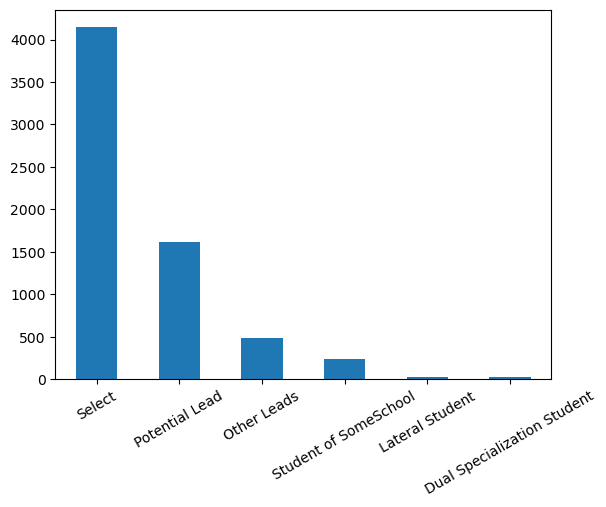

In [19]:
## Checking Tag missing values
Lead_Profile = Cleaning_df['Lead Profile'].value_counts()
Lead_Profile.plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

> 'Select' values= It may be because the customer did not select any option from the list so we will considered as Nan Values
>> We will drop this columns because missing perecentage would more than 50%

In [20]:
## Dropping Lead Profile Cloumns
Cleaning_df= Cleaning_df.drop('Lead Profile',axis=1)

## Checking Data
Cleaning_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened


### D) Checking What is your current occupation columns (Missing Percentage= 29)

In [21]:
## Checking Columns
round((Cleaning_df['What is your current occupation'].value_counts(normalize=True, dropna=False)*100),2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

> Imputing as Nan values into other beacuse I had assumes that these missing values don't fit neatly into the defined categories ('Unemployed', 'Working Professional', 'Student', etc.)

In [22]:
# Impute missing values with 'other'
Cleaning_df['What is your current occupation'].fillna('Other', inplace=True)

### E) Checking Country columns (Missing Percentage= 26)

In [23]:
## Checking Columns
round((Cleaning_df['Country'].value_counts(normalize=True, dropna=False)*100),2).head(10)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Name: Country, dtype: float64

> Country is highly skewed we need to drop

In [24]:
## Dropping Country Cloumns
Cleaning_df= Cleaning_df.drop('Country',axis=1)

## Checking Data
Cleaning_df.shape

(9240, 29)

### F) Checking How did you hear about X Education columns (Missing Percentage= 23)

In [25]:
## Checking Columns
round((Cleaning_df['How did you hear about X Education'].value_counts(normalize=True, dropna=False)*100),2).head(10)

Select                   54.58
NaN                      23.89
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
Name: How did you hear about X Education, dtype: float64

> 'Select' values= It may be because the customer did not select any option from the list so we will considered as Nan Values
>> We will drop this columns because missing perecentage would more than 50%`

In [26]:
## Dropping Country Cloumns
Cleaning_df= Cleaning_df.drop('How did you hear about X Education',axis=1)

## Checking Data
Cleaning_df.shape

(9240, 28)

### F) Checking Specialization columns (Missing Percentage= 15)

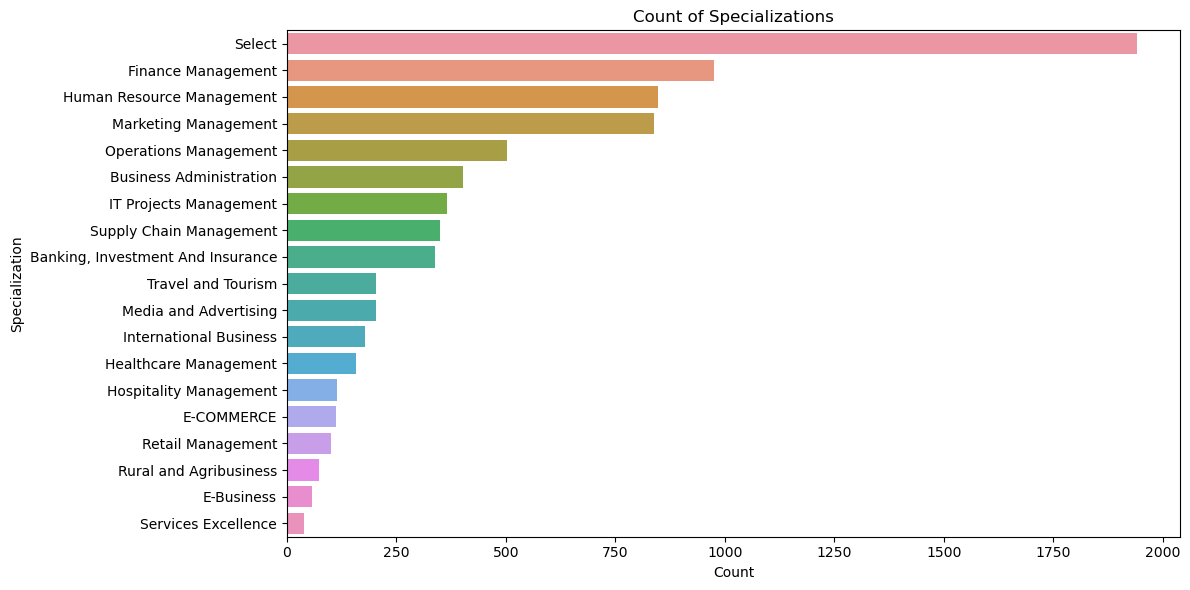

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(y=Cleaning_df['Specialization'].value_counts().index, x=Cleaning_df['Specialization'].value_counts())
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.title('Count of Specializations')
plt.tight_layout()
plt.show()

In [28]:
# Converting NaN and Select values values into Others
Cleaning_df['Specialization'] = Cleaning_df['Specialization'].replace('Select', 'Others')
Cleaning_df['Specialization'] = Cleaning_df['Specialization'].replace(np.nan, 'Others')

In [29]:
## Checking Columns after imputing
round((Cleaning_df['Specialization'].value_counts(normalize=True, dropna=False)*100),2).head()

Others                       36.58
Finance Management           10.56
Human Resource Management     9.18
Marketing Management          9.07
Operations Management         5.44
Name: Specialization, dtype: float64

### G) Checking City columns (Missing Percentage= 15)

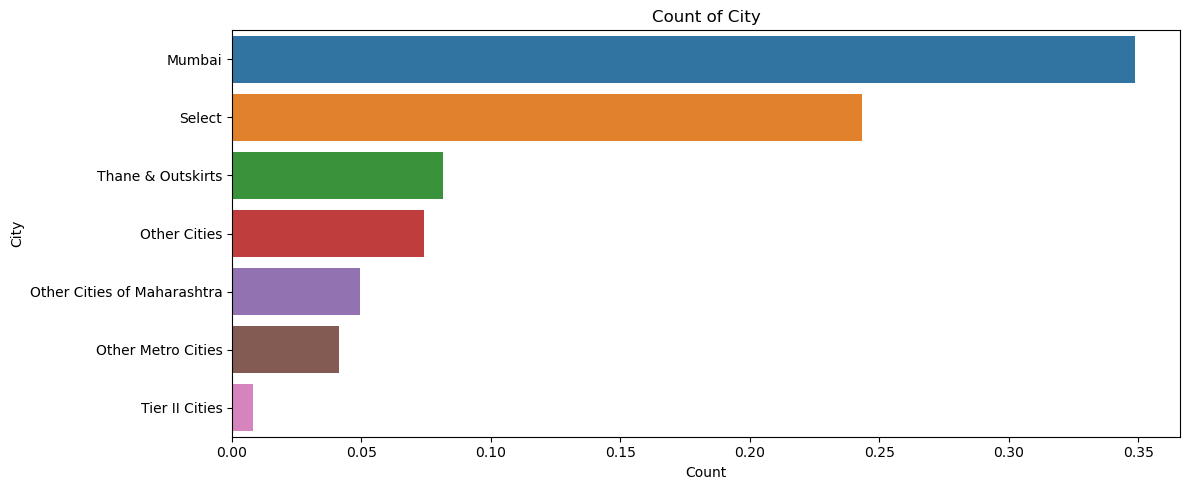

In [30]:
## Plot for city columns 
plt.figure(figsize=(12,5))
sns.barplot(y=Cleaning_df['City'].value_counts(normalize=True, dropna=False).index, 
            x=Cleaning_df['City'].value_counts(normalize=True, dropna=False))
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count of City')
plt.tight_layout()
plt.show()

In [31]:
# Imputing Null and Select with 'Others'
Cleaning_df['City'] = Cleaning_df['City'].replace(np.nan, 'Others')
Cleaning_df['City'] = Cleaning_df['City'].replace('Select', 'Others') # customer did not select any option from the list

In [32]:
# replacing few rows with 'Others' because low data percentage
replace_list = ['Tier II Cities', 'Other Metro Cities', 'Other Cities of Maharashtra', 'Other Cities']

# Replace cities with 'Others'
Cleaning_df['City'].replace(replace_list, 'Others', inplace=True)

# Checking Value counts
print(Cleaning_df['City'].value_counts())

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64


### H) Checking TotalVisits and Page Views Per Visit columns (Missing Percentage= 1.48)

In [33]:
## Value counts of column
Cleaning_df.TotalVisits.value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [34]:
## Value counts of column
Cleaning_df['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [35]:
# Imputing median value as the columns is numerical
Cleaning_df.TotalVisits.fillna(Cleaning_df.TotalVisits.median(), inplace=True)
Cleaning_df['Page Views Per Visit'].fillna(Cleaning_df['Page Views Per Visit'].median(), inplace=True)

print(f"Median TotalVisits: {Cleaning_df['TotalVisits'].median()}")
print(f"Median Page Views Per Visit: {Cleaning_df['Page Views Per Visit'].median()}")

Median TotalVisits: 3.0
Median Page Views Per Visit: 2.0


### I) Checking Last Activity columns (Missing Percentage= 1.11)

In [36]:
## Checking perecantage of rows present in last Activity column
round((Cleaning_df['Last Activity'].value_counts(normalize=True, dropna=False)*100),2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

> Replacing few columns into Other activity because of low data percentage

In [37]:
# List of rows to be replaced with 'Others Activity'
to_replace = ['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
                            'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
                            'Resubscribed to emails', 'Visited Booth in Tradeshow',np.nan]

# Replacing with 'Others'
Cleaning_df['Last Activity'].replace(to_replace, 'Others_Activity', inplace=True)

# Checking the value counts of 'Last Activity'
print(Cleaning_df['Last Activity'].value_counts())

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others_Activity               308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64


### K) Checking Lead Source columns (Missing Percentage= 0.38)

In [38]:
Cleaning_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

> Google and google two same name present just difference of First Letter Capital

In [39]:
# str.title used to capitalizes first letter of Words
Cleaning_df['Lead Source'] = Cleaning_df['Lead Source'].str.title()

# Replacing Null with Others
Cleaning_df['Lead Source'] = Cleaning_df['Lead Source'].replace(np.nan, 'Others')

In [40]:
## Checking Null values
Cleaning_df.isnull().sum().head().sort_values(ascending=False)

Prospect ID     0
Lead Number     0
Lead Origin     0
Lead Source     0
Do Not Email    0
dtype: int64

> No null Values

### 3.2 Fixing two column

In [41]:
Cleaning_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [42]:
# List of rows to be replaced with 'Others Activity'
to_replace = ['Email Bounced', 'Unsubscribed', 'Unreachable', 'Approached upfront',
              'Had a Phone Conversation', 'Email Marked Spam', 'Resubscribed to emails', 
              'Approached upfront','Email Received', 'Form Submitted on Website','View in browser link Clicked']

# Replacing with 'Others'
Cleaning_df['Last Notable Activity'].replace(to_replace, 'Others', inplace=True)

# Checking the value counts of 'Last Notable Activity'
print(Cleaning_df['Last Notable Activity'].value_counts())

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64


In [43]:
Cleaning_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
Bing                    6
Click2Call              4
Press_Release           2
Social Media            2
Live Chat               2
Youtubechannel          1
Testone                 1
Pay Per Click Ads       1
Welearnblog_Home        1
Welearn                 1
Blog                    1
Nc_Edm                  1
Name: Lead Source, dtype: int64

In [44]:
# List of rows to be replaced with 'Others Activity'
to_replace = ['Bing', 'Click2Call', 'Press_Release', 'Social Media',
              'Live Chat', 'Youtubechannel', 'Testone', 'Pay Per Click Ads',
              'Welearnblog_Home','Welearn', 'Blog','Nc_Edm']

# Replacing with 'Others'
Cleaning_df['Lead Source'].replace(to_replace, 'Others', inplace=True)

# Checking the value counts of 'Lead Source'
print(Cleaning_df['Lead Source'].value_counts())

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64


## 3.3) Checking Duplicates

In [45]:
## Checking any Double Rows
Cleaning_df[Cleaning_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


> No duplicates

## 3.4) Handling Outliers

In [46]:
## Checking Numerical Series For Boxplot
df= Cleaning_df.select_dtypes(include=np.number)
df.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

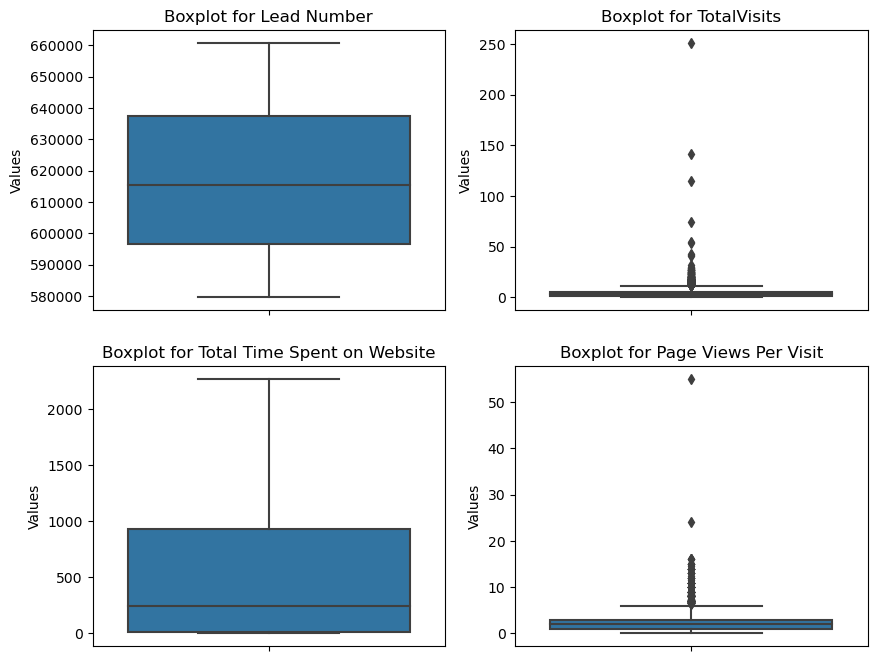

In [47]:
# Plotting Boxplot

data = ['Lead Number', 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(10,8))

x = 1
for a in data:
    plt.subplot(2,2,x)
    sns.boxplot(y=a, data=Cleaning_df)
    plt.title(f'Boxplot for {a}')
    plt.ylabel('Values')
    x+=1
plt.show()

> No Outliner for Lead Number and Total Time Spent on Website
>> Need to fix outliner for Total Vists and Page views per visit

In [48]:
## Fixing outliners 
quantile_df = Cleaning_df['TotalVisits'].quantile([0.05, 0.95])
quantile_df1 = Cleaning_df['Page Views Per Visit'].quantile([0.05, 0.95])

# Fixing the values through Clip method
Cleaning_df['TotalVisits'] = Cleaning_df['TotalVisits'].clip(quantile_df.iloc[0], quantile_df.iloc[1])
Cleaning_df['Page Views Per Visit'] = Cleaning_df['Page Views Per Visit'].clip(quantile_df1.iloc[0], quantile_df1.iloc[1])

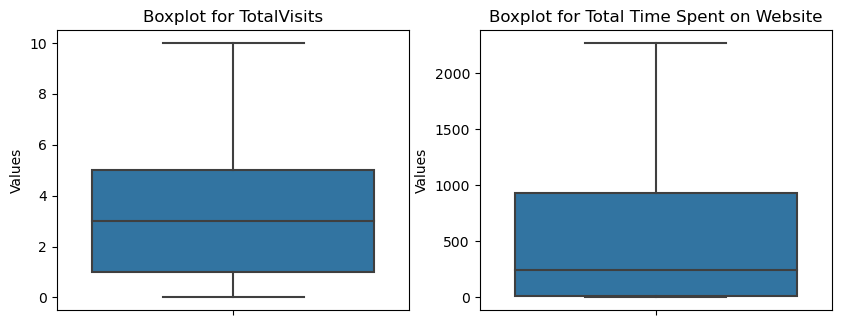

In [49]:
# Plotting Boxplot again for Viualising

data = [ 'TotalVisits','Total Time Spent on Website']
plt.figure(figsize=(10,8))

x = 1
for a in data:
    plt.subplot(2,2,x)
    sns.boxplot(y=a, data=Cleaning_df)
    plt.title(f'Boxplot for {a}')
    plt.ylabel('Values')
    x+=1
plt.show()

### 3.5) Retaining Percentage

In [50]:
## Rows and columns 
retained = round((Cleaning_df.shape[0] / Reading_df.shape[0]) *100 ,2)  ## reading_df is the orginal dataset3.2 Renaming Few columns
retained_df= round((Cleaning_df.shape[1] / Reading_df.shape[1]) *100 ,2)


print(f"Rows Retained Percentage: {retained}")
print(f"Columns Retained Percentage: {retained_df}")

Rows Retained Percentage: 100.0
Columns Retained Percentage: 75.68


## Step 4)Exploratory data analysis (EDA)

### 4.1) Visualisation for Numerical Variables

### 4.1.1) Numeric columns Releationship with Target

<Figure size 1900x1600 with 0 Axes>

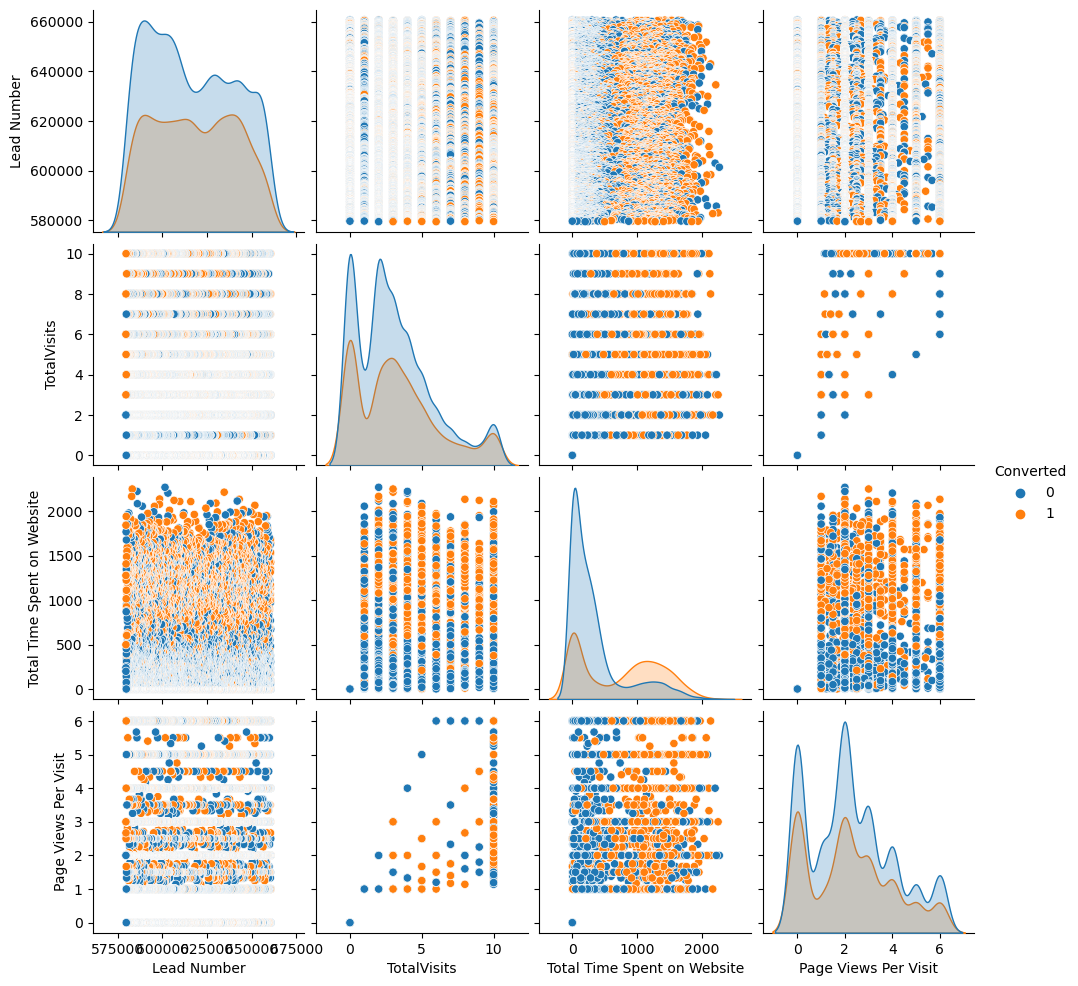

In [51]:
Eda_df= Cleaning_df.copy()

## Pairplot 
plt.figure(figsize=(19,16))
sns.pairplot(Eda_df, hue= 'Converted')
plt.show()

### 4.1.2) Heatmap

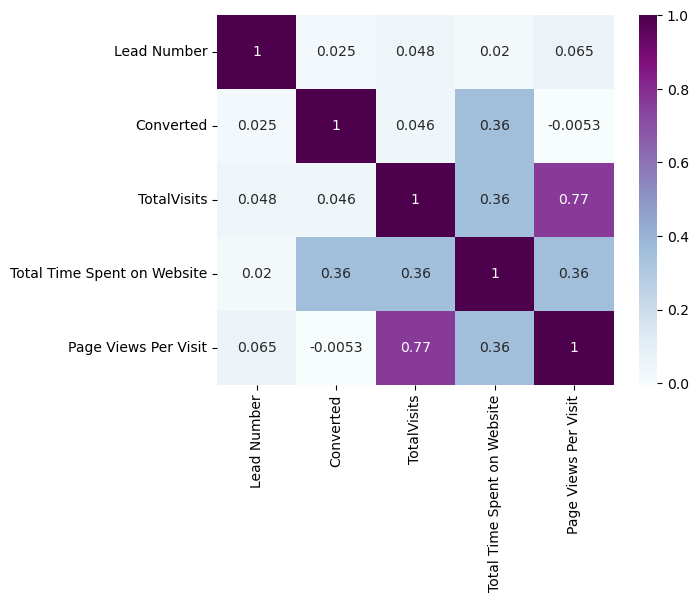

In [52]:
# Heatmap of correlation
sns.heatmap(Eda_df.corr(), cmap="BuPu", annot = True)
plt.show()

### 4.1.3) BarPlot

In [53]:
## Define the Function
def def_barplot(x,y):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=Eda_df, x=x, y=y)
    plt.title(f'Bar Plot of {y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

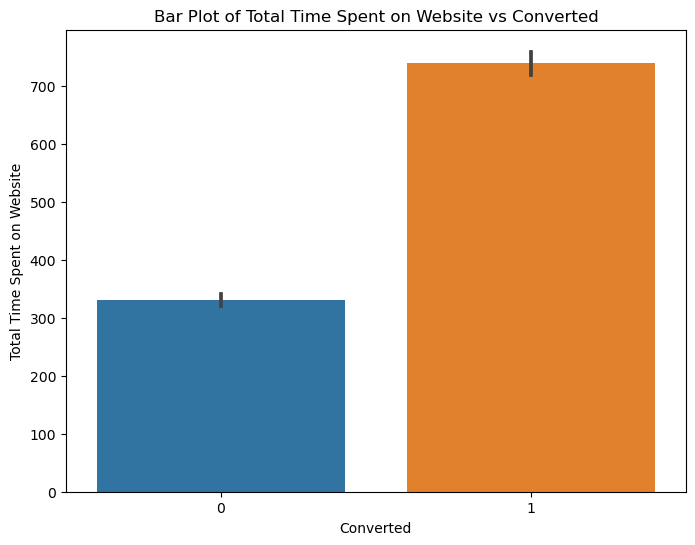

In [54]:
# Plotting Barplot 
def_barplot(x= 'Converted', y='Total Time Spent on Website')

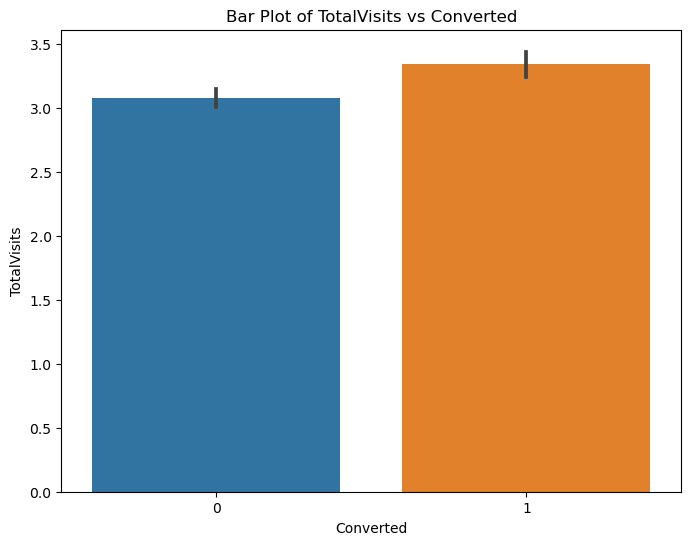

In [55]:
# Plotting Barplot 
def_barplot(x= 'Converted', y='TotalVisits')

> Leads are spending more time on websites which may turn into converted
>> Both users are engaged on websites and no conclusion can be drawn on the basis of Total Visits columns

### 4.2) Univariate Analysis for Categorical Variables

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

def def_univariate(X):
    plt.figure(figsize=(6, 5))
    sns.histplot(Eda_df[X], bins = 250)
    plt.xticks(rotation=25)  # Rotate x-axis labels
    plt.title(f'Distribution of {X}')

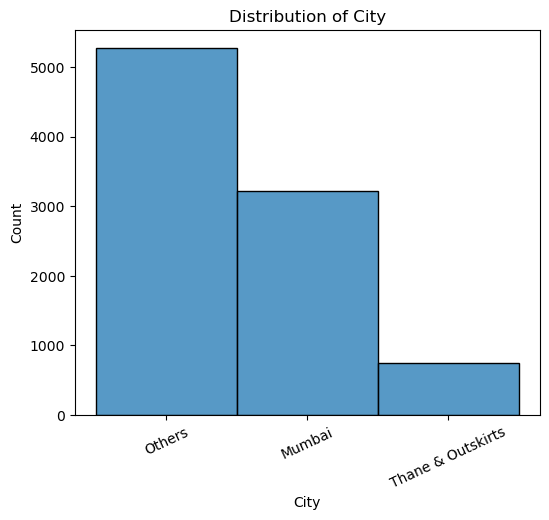

In [57]:
## Histogram of City
def_univariate('City')

> Customers didn't mention their city

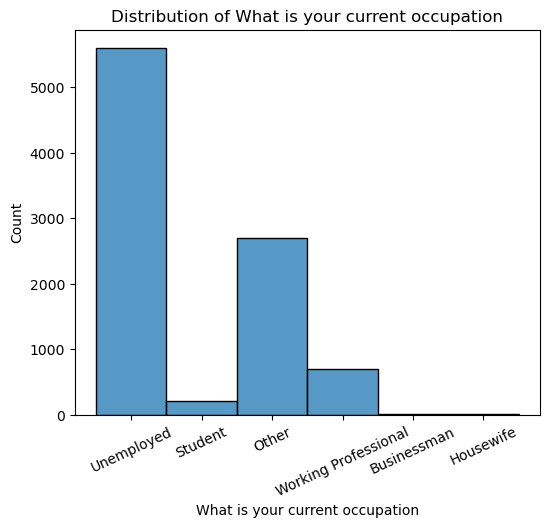

In [58]:
## Histogram of What is your current occupation
def_univariate ( 'What is your current occupation')

> Unemployed are targeting more which means they may be easily converted option
>> Businessman and Housewife are atleast interest

Text(0.5, 1.0, 'Distribution of Last Notable Activity')

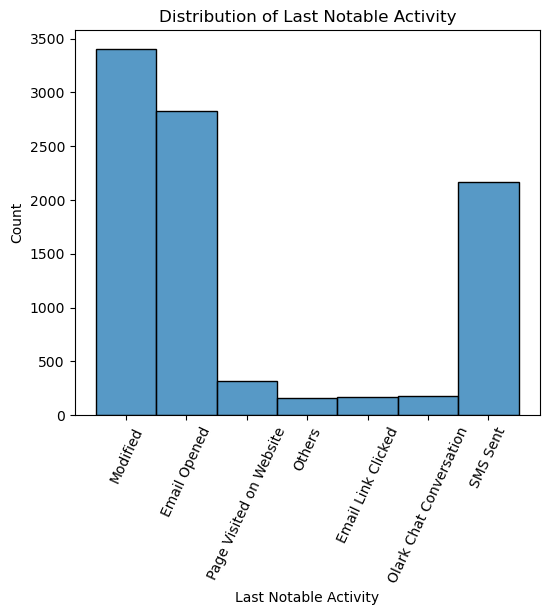

In [59]:
## Histogram of Last Notable Activity
plt.figure(figsize=(6, 5))
sns.histplot(Eda_df['Last Notable Activity'], bins = 250)
plt.xticks(rotation=65)  # Rotate x-axis labels
plt.title('Distribution of Last Notable Activity')

### 4.3) Bivariate and Multivariate Analysis for Categorical Variables

In [60]:
## Checking all Categorical Variables
df1= Eda_df.select_dtypes(include=np.object)
df1.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
## Defining Function  for Graph
def plot_func(X,rotation ):
    plt.figure(figsize= (7,5))
    sns.set(font_scale=1.0) # Set the font scale
    sns.countplot(data= Eda_df, x=X, hue="Converted", palette= 'winter_r')
    plt.legend(title="Converted", loc='upper right')  # Show legend with specified title
    plt.xticks(rotation = rotation)
    plt.show()

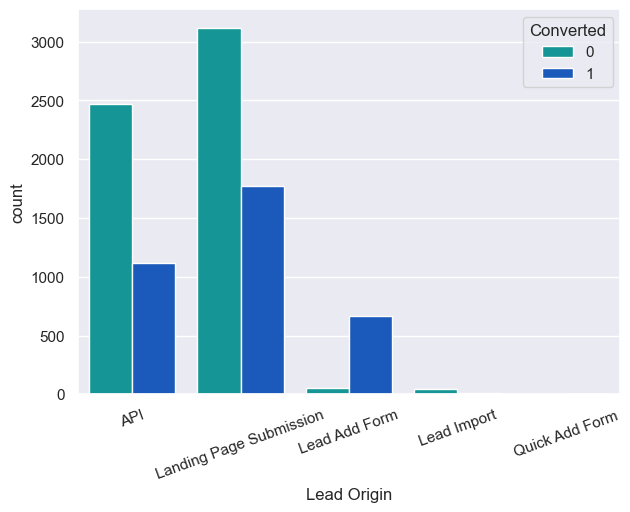

In [62]:
plot_func('Lead Origin', rotation=20)

> The conversion rate via API and Landing Page Submission is just 30–35%, a significant number of leads come from these.
>> Although the Lead Add Form has a conversion rate of above 90%, the total number of leads are low.
>>> There are extremely little lead imports.

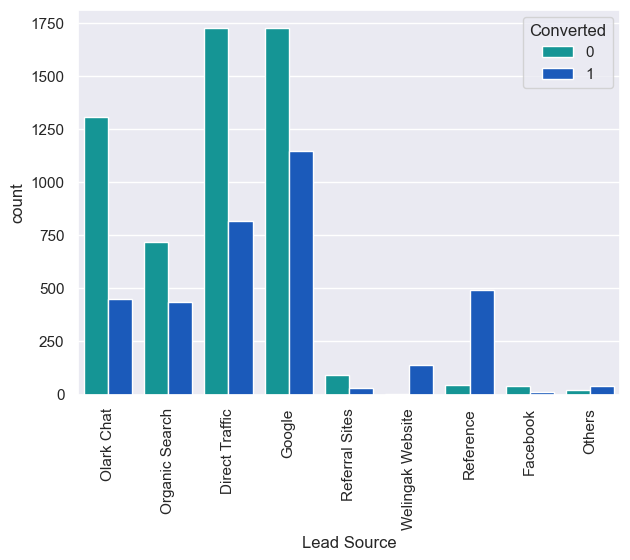

In [63]:
plot_func('Lead Source',rotation=90)

> Number of leads are maximum genertaed through Google abd Direct Traffic
>> Referral sites and facebook are providing least lead

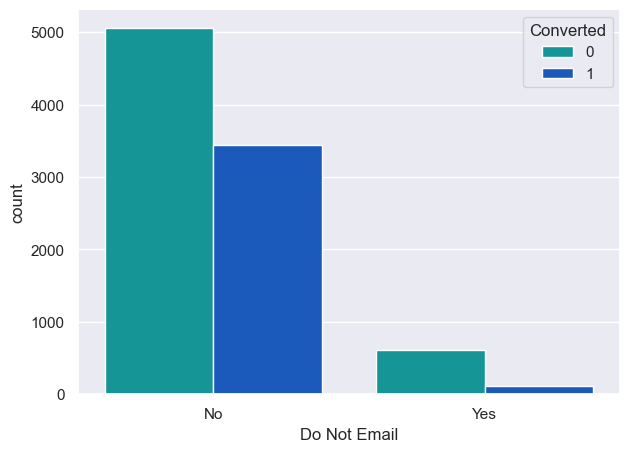

In [64]:
plot_func('Do Not Email',rotation=0)

> Data are highly skewed so no inference could be drawn

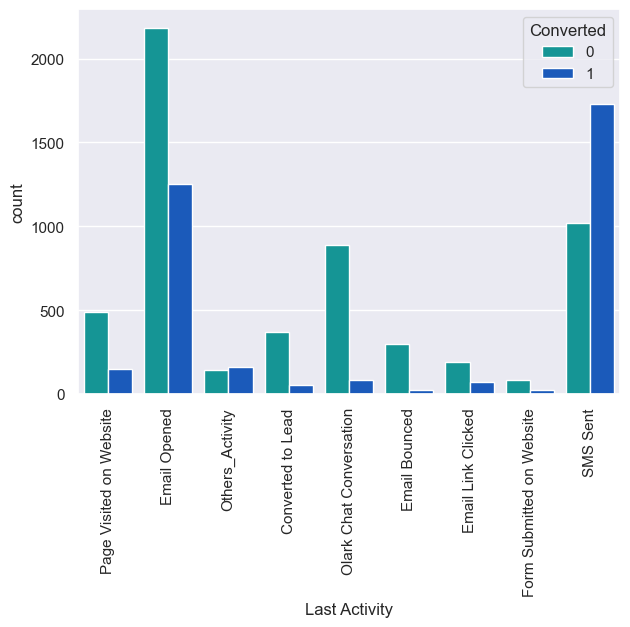

In [65]:
plot_func('Last Activity',rotation=90)

> Most of people had email opened and around 45% had generated leads
>> SMS Sent has 60 percenat of conversion rate

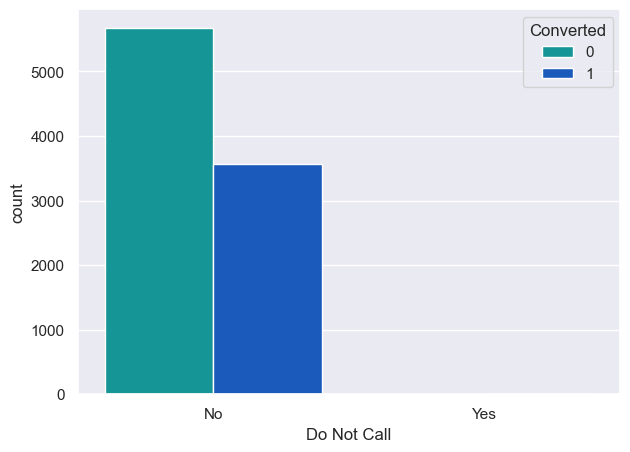

In [66]:
plot_func('Do Not Call',rotation=0)

> Comparsion could not be drawn due to high presence of data towards NO`

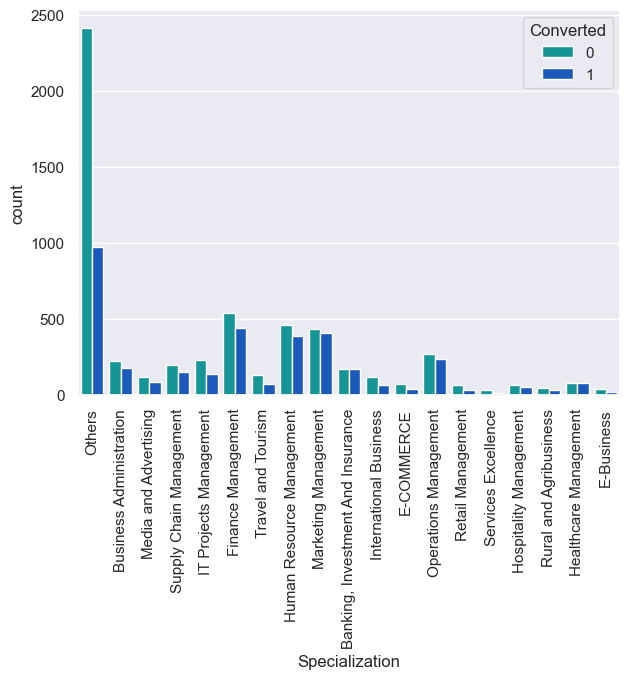

In [67]:
plot_func('Specialization',rotation=90)

>  Finance Management and Marketing Management has a good conversion rate but number are low

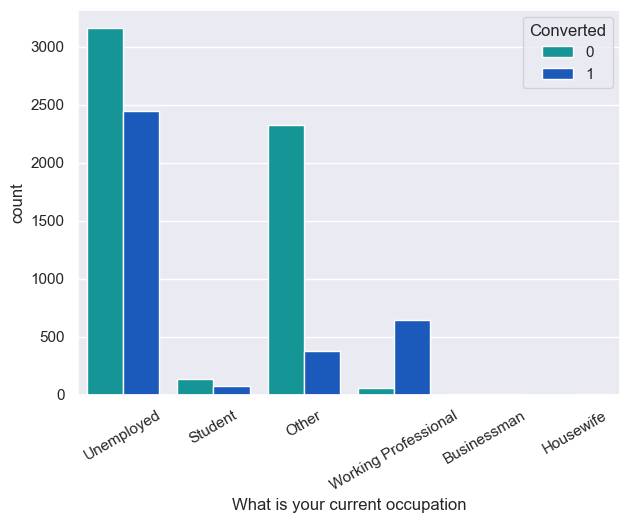

In [68]:
plot_func('What is your current occupation',rotation=30)

> Unemployed has around 35 percentage of conversion rate
>> Working Professional are high on joining it.

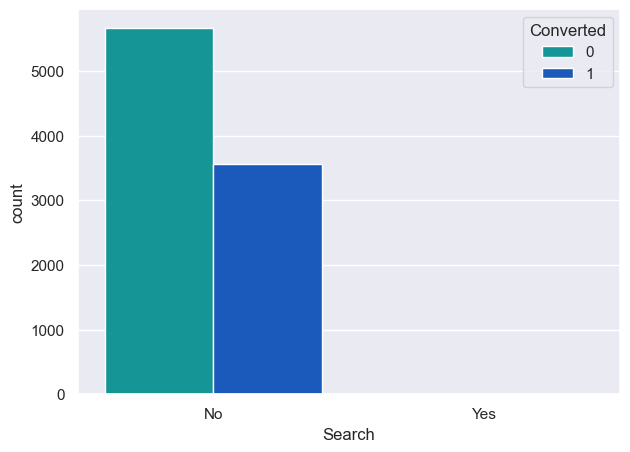

In [69]:
plot_func('Search',rotation=0)

> No inference could be drawn as data is more on No side

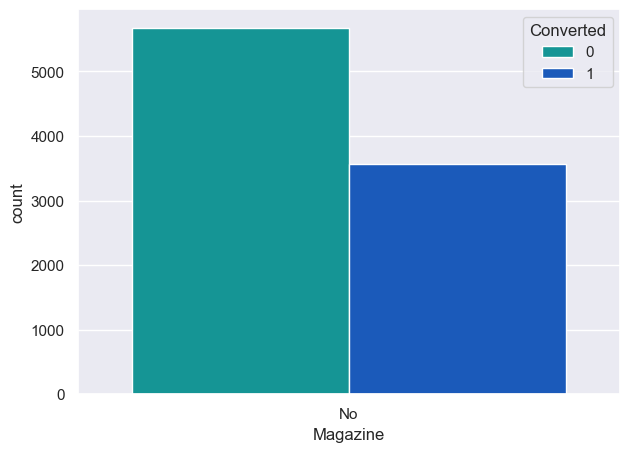

In [70]:
plot_func('Magazine',rotation=0)

> No inference could be drawn as data is more on No side

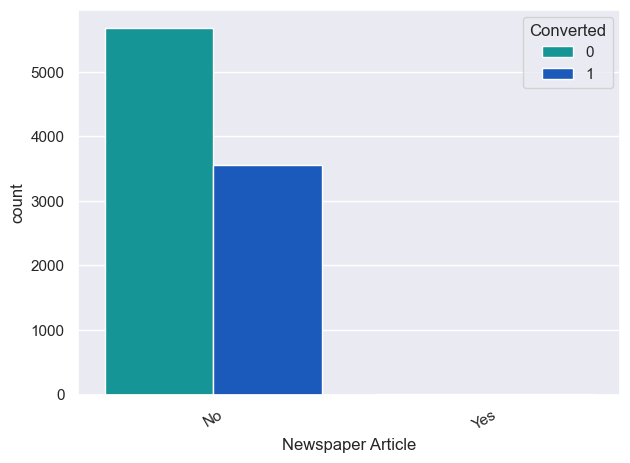

In [71]:
plot_func('Newspaper Article',rotation=30)

> No inference could be drawn as data is more on No side

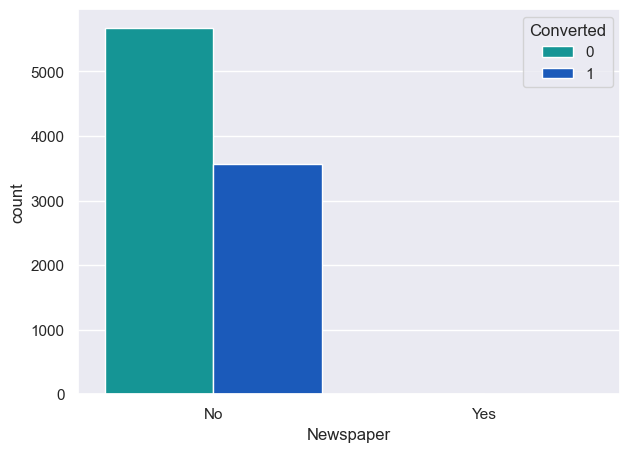

In [72]:
plot_func('Newspaper',rotation=0)

> No inference could be drawn as data is more on No side

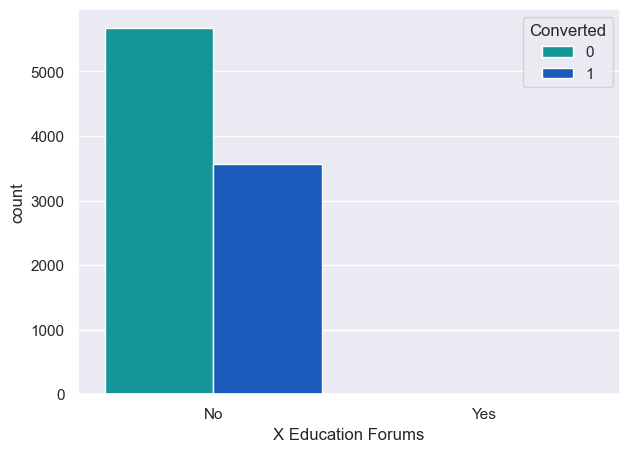

In [73]:
plot_func('X Education Forums',rotation=0)

> No inference could be drawn as data is more on No side

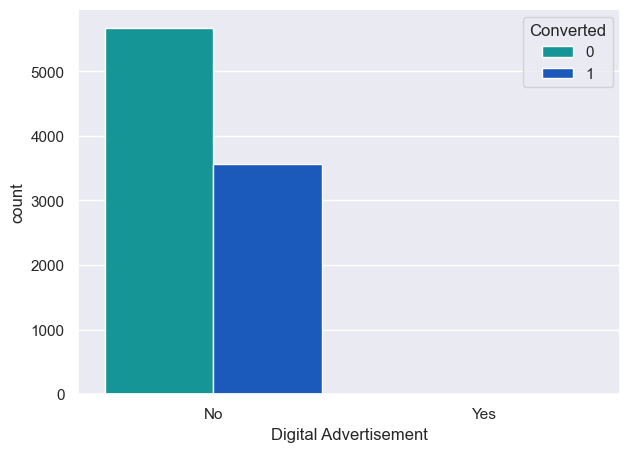

In [74]:
plot_func('Digital Advertisement',rotation=0)

> No inference could be drawn as data is more on No side

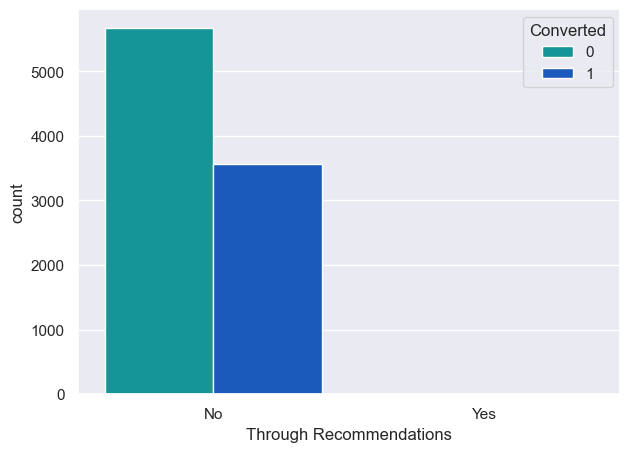

In [75]:
plot_func('Through Recommendations',rotation=0)

> No inference could be drawn as data is more on No side

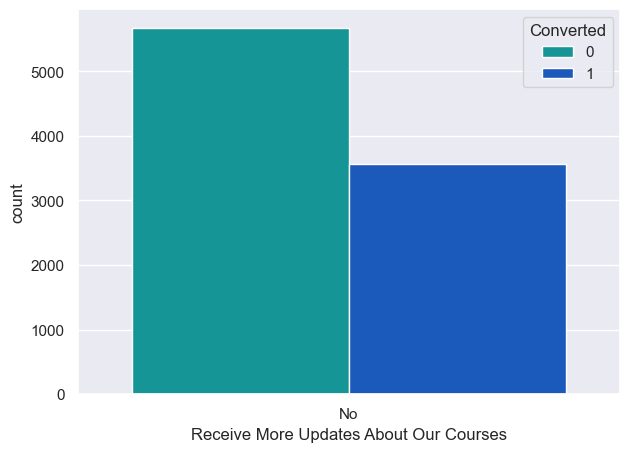

In [76]:
plot_func('Receive More Updates About Our Courses',rotation=0)

> No inference could be drawn as data is more on No side

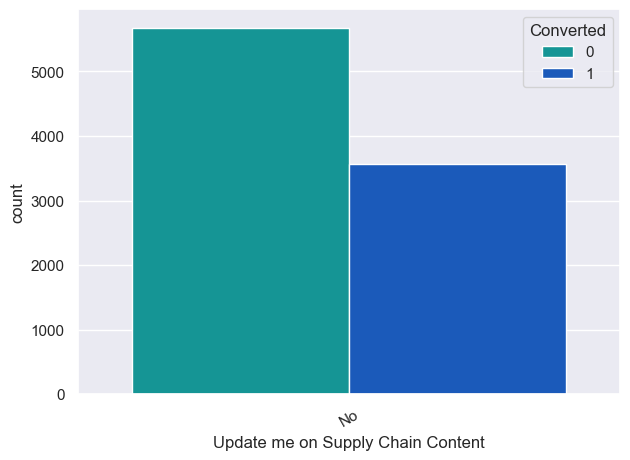

In [77]:
plot_func('Update me on Supply Chain Content',rotation=30)

> No inference could be drawn as data is more on No side

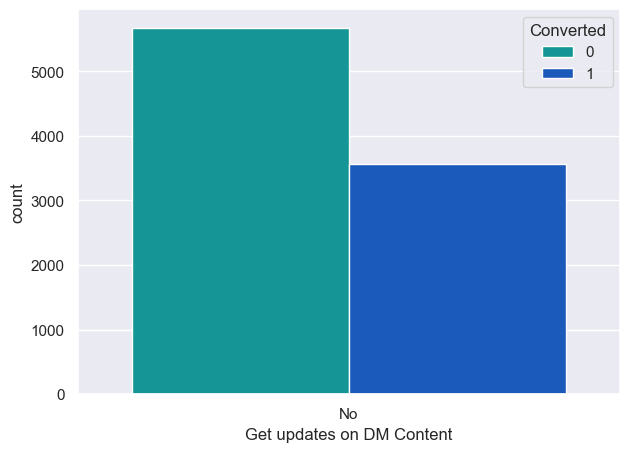

In [78]:
plot_func('Get updates on DM Content',rotation=0)

> No inference could be drawn as data is more on No side

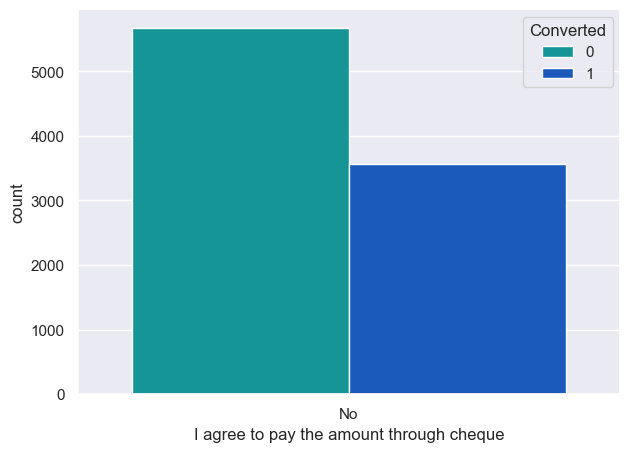

In [79]:
plot_func('I agree to pay the amount through cheque',rotation=0)

> No inference could be drawn as data is more on No side

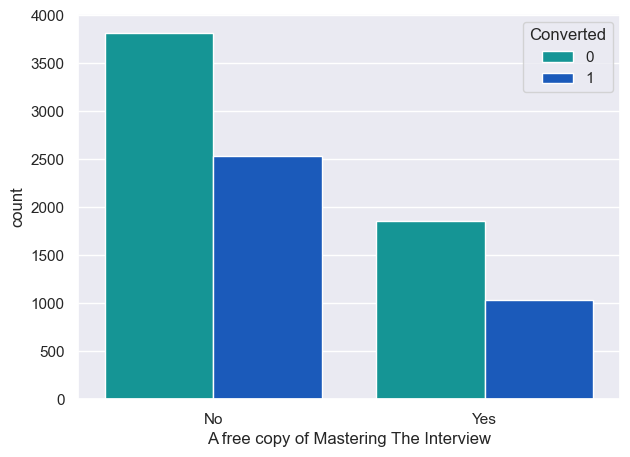

In [80]:
plot_func('A free copy of Mastering The Interview',rotation=0)

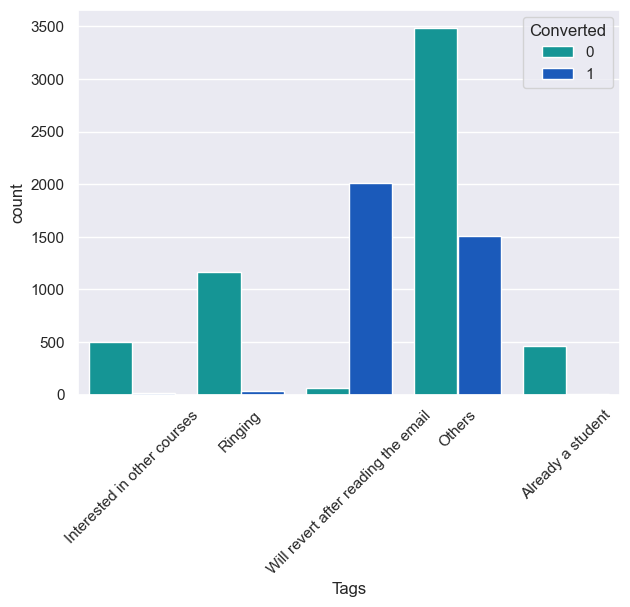

In [81]:
plot_func('Tags',rotation=45)

> This column is not requiered as Sales Team made this column for themselves , hence we need to remove

In [82]:
## Dropping Tags Columns
Eda_df.drop(columns='Tags',axis=0,inplace=True)

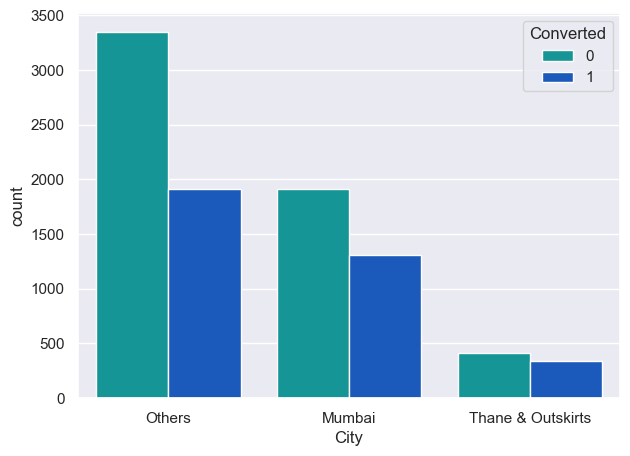

In [83]:
plot_func('City',rotation=0)

> from Mumbai more than 50 percent of leads are conversion rate .

> from Thane & Outskirts more than 70 percent of leads are conversion rate but total number are low

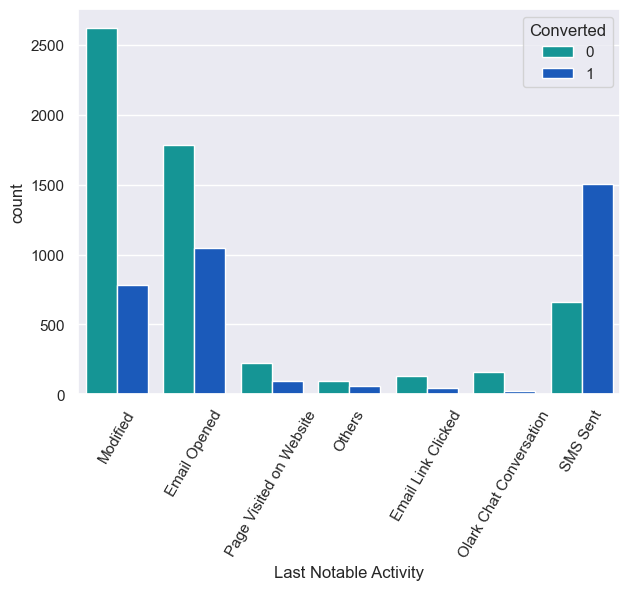

In [84]:
plot_func('Last Notable Activity',rotation=60)

> SMS Sent has 60 percenat of conversion rate

In [85]:
pivot_table = pd.pivot_table(data=Eda_df,  columns='City', values='Converted',index='What is your current occupation')
pivot_table

City,Mumbai,Others,Thane & Outskirts
What is your current occupation,,,
Businessman,0.000000,0.833333,0.000000
Housewife,1.000000,1.000000,1.000000
Other,0.175202,0.123060,0.175000
Student,0.510638,0.221154,0.583333
Unemployed,0.419991,0.438644,0.485549
Working Professional,0.927126,0.920200,0.844828


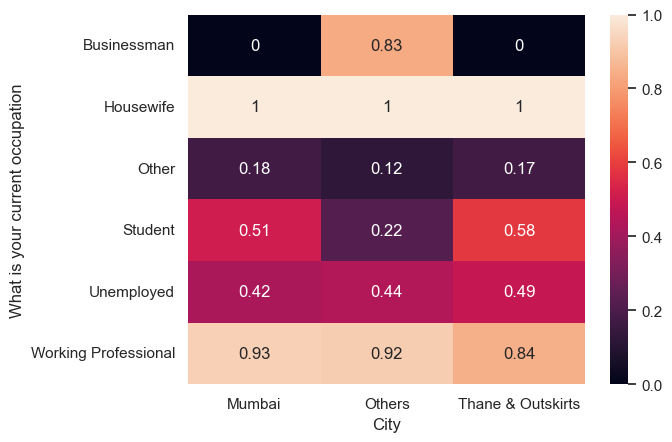

In [86]:
sns.heatmap(pivot_table, annot=True)
plt.show()

### Overall Result from Visualize is Few columns are not good parameter for model building and even doest not contribute much to Leads Generation

In [87]:
# List of columns to be dropped
to_drop = ['Lead Number', 'Search','Magazine','Newspaper Article','X Education Forums',
              'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
              'A free copy of Mastering The Interview','Prospect ID']

Eda_df.drop(columns= to_drop , axis=0, inplace=True)

In [88]:
## Checking Shape of data after dropping
Eda_df.shape

(9240, 13)

## Step 5) Data Preprocessing

### 5.1) Label Encoding

In [89]:
## Converting Categorial Variable into Numerical

from sklearn. preprocessing import LabelEncoder ## Importing Libaris
le = LabelEncoder()
Eda_df['Do Not Email']= le.fit_transform(Eda_df['Do Not Email']) 
Eda_df['Do Not Call']= le.fit_transform(Eda_df['Do Not Call'])

# Checking Column after LabelEncoder
Eda_df['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

### 5.2) Dummies creation

In [90]:
## For the categorical variables, creating a dummies
Dummies_creation = pd.get_dummies(Eda_df[["Lead Origin","Lead Source",'Last Activity','Specialization',
                                             'What is your current occupation','City',
                                              'Last Notable Activity']],drop_first=True)

Dummies_creation.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [91]:
## Concating Dummies into Final Dataset
Data_Preprocessing = pd.concat([Eda_df, Dummies_creation], axis=1)

## Deleting the column which were used for dummies
Data_Preprocessing.drop(["Lead Origin","Lead Source",'Last Activity','Specialization',
                                             'What is your current occupation','City',
                                              'Last Notable Activity'], axis=1, inplace=True)

In [92]:
## Checking the shape
Data_Preprocessing.shape

(9240, 57)

### 5.3) Standardarised the Values

In [93]:
## Standarised the values for anaylsis
from sklearn.preprocessing import StandardScaler ## Importing Libaries
StandardScaler = StandardScaler()

Data_Preprocessing['TotalVisits']= StandardScaler.fit_transform(Data_Preprocessing[['TotalVisits']]) 
Data_Preprocessing['Total Time Spent on Website']= StandardScaler.fit_transform(
    Data_Preprocessing[['Total Time Spent on Website']])
Data_Preprocessing['Page Views Per Visit']= StandardScaler.fit_transform(Data_Preprocessing[['Page Views Per Visit']]) 

In [94]:
# Checking the values
Data_Preprocessing.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,-1.151445,-0.889974,-1.267358,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,0,0,0,0.659447,0.339972,0.137630,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
2,0,0,1,-0.427088,1.905689,-0.143368,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,-0.789267,-0.333396,-0.705363,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,-0.427088,1.715905,-0.705363,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## 5.4) Train-Test Split

In [95]:
# Spliting into X and Y
X = Data_Preprocessing.drop(['Converted'], axis=1)
y = Data_Preprocessing['Converted']
      
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (9240, 56)
Y shape: (9240,)


In [96]:
## Spliting into 70:30 Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (6468, 56)
Y_train shape: (6468,)
X_test shape: (2772, 56)
Y_test shape: (2772,)


## Step-6) Feature Selection Using RFE

In [97]:
### Model building for Rfe

model = LogisticRegression()

rfe = RFE(model,n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [98]:
# Features distrution by rfe
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 32),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 24),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others_Activity', False, 6),
 ('Last Activity_Page Visited on Website', False, 11

In [99]:
## Features which support the target
rfe_support = x_train.columns[rfe.support_]
rfe_support

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Step-7) Model Building

### Model-1

In [100]:
## Building First model b
first = sm.add_constant(x_train[rfe_support])
model1 = sm.GLM(y_train,first, family = sm.families.Binomial())
testing_model_1 = model1.fit()
testing_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.0
Date:                Mon, 15 Jan 2024   Deviance:                       5220.1
Time:                        02:16:00   Pearson chi2:                 6.40e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4084
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5138      0.160     -3.211      0.001      -0.827      -0.200
Do Not Email                                            -1.4302      0.198     -7.234      0.000      -1.818      -1.043
Total Time Spent on Website                              1.0547      0.040     26.408      0.000       0.976       1.133
Lead Origin_Landing Page Submission                     -0.9424      0.125     -7.565      0.000      -1.187      -0.698
Lead Origin_Lead Add Form                                1.9004      0.782      2.430      0.015       0.368       3.433
Lead Source_Olark Chat                                   1.0024      0.122      8.183      0.000       0.762       1.242
Lead Source_Others                                       1.0899      0.591      1.843      0.065      -0.069       2.249
Lead Source_Reference                                    1.0345      0.808      1.280      0.200      -0.549       2.618
Lead Source_Welingak Website                            23.9597   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
Last Activity_Email Bounced                             -0.7660      0.374     -2.046      0.041      -1.500      -0.032
Last Activity_Email Opened                               0.4474      0.117      3.837      0.000       0.219       0.676
Last Activity_Olark Chat Conversation                   -0.7174      0.183     -3.924      0.000      -1.076      -0.359
Last Activity_SMS Sent                                   1.0030      0.166      6.056      0.000       0.678       1.328
Specialization_Hospitality Management                   -0.8966      0.330     -2.719      0.007      -1.543      -0.250
Specialization_Others                                   -0.9171      0.122     -7.511      0.000      -1.156      -0.678
What is your current occupation_Housewife               24.4218   4.42e+04      0.001      1.000   -8.67e+04    8.67e+04
What is your current occupation_Other                   -1.0735      0.088    -12.152      0.000      -1.247      -0.900
What is your current occupation_Working Professional     2.1872      0.186     11.773      0.000       1.823       2.551
Last Notable Activity_Modified                          -0.2330      0.108     -2.153      0.031      -0.445      -0.021
Last Notable Activity_Others                             2.0902      0.308      6.788      0.000       1.487       2.694
Last Notable Activity_SMS Sent                           0.8741      0.186      4.711      0.000       0.510       1.238
========================================================================================================================
"""

> Will Try to improve model further by removing What is your current occupation_Housewife due to high pvalues

### Model-2

In [101]:
# Dropping
rfe_support_1 = rfe_support.drop('What is your current occupation_Housewife')

## Building Second model
Second = sm.add_constant(x_train[rfe_support_1])
model2 = sm.GLM(y_train,Second, family = sm.families.Binomial())
testing_model_2 = model2.fit()
testing_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.3
Date:                Mon, 15 Jan 2024   Deviance:                       5228.5
Time:                        02:16:00   Pearson chi2:                 6.41e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5120      0.160     -3.205      0.001      -0.825      -0.199
Do Not Email                                            -1.4322      0.198     -7.244      0.000      -1.820      -1.045
Total Time Spent on Website                              1.0558      0.040     26.445      0.000       0.978       1.134
Lead Origin_Landing Page Submission                     -0.9405      0.124     -7.557      0.000      -1.184      -0.697
Lead Origin_Lead Add Form                                1.9053      0.782      2.435      0.015       0.372       3.439
Lead Source_Olark Chat                                   1.0037      0.122      8.194      0.000       0.764       1.244
Lead Source_Others                                       1.0869      0.591      1.838      0.066      -0.072       2.246
Lead Source_Reference                                    1.0411      0.808      1.288      0.198      -0.543       2.625
Lead Source_Welingak Website                            23.9559   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
Last Activity_Email Bounced                             -0.7701      0.375     -2.056      0.040      -1.504      -0.036
Last Activity_Email Opened                               0.4494      0.116      3.864      0.000       0.221       0.677
Last Activity_Olark Chat Conversation                   -0.7224      0.183     -3.953      0.000      -1.081      -0.364
Last Activity_SMS Sent                                   0.9942      0.166      6.006      0.000       0.670       1.319
Specialization_Hospitality Management                   -0.9020      0.330     -2.735      0.006      -1.548      -0.256
Specialization_Others                                   -0.9203      0.122     -7.541      0.000      -1.159      -0.681
What is your current occupation_Other                   -1.0770      0.088    -12.195      0.000      -1.250      -0.904
What is your current occupation_Working Professional     2.1815      0.186     11.744      0.000       1.817       2.546
Last Notable Activity_Modified                          -0.2253      0.108     -2.087      0.037      -0.437      -0.014
Last Notable Activity_Others                             2.0917      0.308      6.792      0.000       1.488       2.695
Last Notable Activity_SMS Sent                           0.8815      0.185      4.753      0.000       0.518       1.245
========================================================================================================================
"""

> Will Try to improve model further by removing Lead Source_Welingak Website due to high pvalues

### Model-3

In [102]:
# Dropping
rfe_support_2 = rfe_support_1.drop('Lead Source_Welingak Website')

## Building Third model
Third = sm.add_constant(x_train[rfe_support_2])
model3 = sm.GLM(y_train,Third, family = sm.families.Binomial())
testing_model_3 = model3.fit()
testing_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.5
Date:                Mon, 15 Jan 2024   Deviance:                       5244.9
Time:                        02:16:00   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5033      0.160     -3.155      0.002      -0.816      -0.191
Do Not Email                                            -1.4562      0.198     -7.339      0.000      -1.845      -1.067
Total Time Spent on Website                              1.0535      0.040     26.405      0.000       0.975       1.132
Lead Origin_Landing Page Submission                     -0.9433      0.124     -7.580      0.000      -1.187      -0.699
Lead Origin_Lead Add Form                                4.5264      0.510      8.883      0.000       3.528       5.525
Lead Source_Olark Chat                                   0.9917      0.122      8.099      0.000       0.752       1.232
Lead Source_Others                                      -0.2637      0.588     -0.449      0.654      -1.415       0.888
Lead Source_Reference                                   -1.5868      0.545     -2.913      0.004      -2.655      -0.519
Last Activity_Email Bounced                             -0.8416      0.381     -2.212      0.027      -1.587      -0.096
Last Activity_Email Opened                               0.4530      0.116      3.902      0.000       0.225       0.681
Last Activity_Olark Chat Conversation                   -0.7142      0.182     -3.914      0.000      -1.072      -0.357
Last Activity_SMS Sent                                   1.0017      0.165      6.071      0.000       0.678       1.325
Specialization_Hospitality Management                   -0.9036      0.330     -2.739      0.006      -1.550      -0.257
Specialization_Others                                   -0.9208      0.122     -7.538      0.000      -1.160      -0.681
What is your current occupation_Other                   -1.0759      0.088    -12.185      0.000      -1.249      -0.903
What is your current occupation_Working Professional     2.1770      0.186     11.716      0.000       1.813       2.541
Last Notable Activity_Modified                          -0.2277      0.108     -2.115      0.034      -0.439      -0.017
Last Notable Activity_Others                             2.1378      0.311      6.876      0.000       1.528       2.747
Last Notable Activity_SMS Sent                           0.8695      0.185      4.706      0.000       0.507       1.232
========================================================================================================================
"""

> Will Try to improve model further by removing Lead Source_Others due to high pvalues

### Model-4

In [103]:
# Dropping
rfe_support_3 = rfe_support_2.drop('Lead Source_Others')

## Building Forth model
Forth = sm.add_constant(x_train[rfe_support_3])
model4 = sm.GLM(y_train,Forth, family = sm.families.Binomial())
testing_model_4 = model4.fit()
testing_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.6
Date:                Mon, 15 Jan 2024   Deviance:                       5245.1
Time:                        02:16:00   Pearson chi2:                 6.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5053      0.159     -3.169      0.002      -0.818      -0.193
Do Not Email                                            -1.4605      0.198     -7.363      0.000      -1.849      -1.072
Total Time Spent on Website                              1.0535      0.040     26.404      0.000       0.975       1.132
Lead Origin_Landing Page Submission                     -0.9418      0.124     -7.571      0.000      -1.186      -0.698
Lead Origin_Lead Add Form                                4.4397      0.463      9.598      0.000       3.533       5.346
Lead Source_Olark Chat                                   0.9930      0.122      8.111      0.000       0.753       1.233
Lead Source_Reference                                   -1.4982      0.499     -3.000      0.003      -2.477      -0.519
Last Activity_Email Bounced                             -0.8613      0.380     -2.269      0.023      -1.605      -0.117
Last Activity_Email Opened                               0.4531      0.116      3.903      0.000       0.226       0.681
Last Activity_Olark Chat Conversation                   -0.7151      0.182     -3.919      0.000      -1.073      -0.357
Last Activity_SMS Sent                                   1.0036      0.165      6.085      0.000       0.680       1.327
Specialization_Hospitality Management                   -0.9024      0.330     -2.735      0.006      -1.549      -0.256
Specialization_Others                                   -0.9194      0.122     -7.529      0.000      -1.159      -0.680
What is your current occupation_Other                   -1.0764      0.088    -12.191      0.000      -1.249      -0.903
What is your current occupation_Working Professional     2.1780      0.186     11.721      0.000       1.814       2.542
Last Notable Activity_Modified                          -0.2279      0.108     -2.117      0.034      -0.439      -0.017
Last Notable Activity_Others                             2.1464      0.311      6.910      0.000       1.538       2.755
Last Notable Activity_SMS Sent                           0.8680      0.185      4.699      0.000       0.506       1.230
========================================================================================================================
"""

> Will Try to improve model further by removing Specialization_Hospitality Management due to high pvalues

### Model-5

In [104]:
# Dropping
rfe_support_4 = rfe_support_3.drop('Specialization_Hospitality Management')

## Building Fith model
Fith = sm.add_constant(x_train[rfe_support_4])
model5 = sm.GLM(y_train,Fith, family = sm.families.Binomial())
testing_model_5 = model5.fit()
testing_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.4
Date:                Mon, 15 Jan 2024   Deviance:                       5252.7
Time:                        02:16:00   Pearson chi2:                 6.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5272      0.159     -3.310      0.001      -0.839      -0.215
Do Not Email                                            -1.4557      0.198     -7.353      0.000      -1.844      -1.068
Total Time Spent on Website                              1.0500      0.040     26.366      0.000       0.972       1.128
Lead Origin_Landing Page Submission                     -0.9301      0.124     -7.488      0.000      -1.174      -0.687
Lead Origin_Lead Add Form                                4.4397      0.463      9.588      0.000       3.532       5.347
Lead Source_Olark Chat                                   0.9926      0.122      8.113      0.000       0.753       1.232
Lead Source_Reference                                   -1.5234      0.499     -3.050      0.002      -2.502      -0.544
Last Activity_Email Bounced                             -0.8953      0.379     -2.365      0.018      -1.637      -0.153
Last Activity_Email Opened                               0.4521      0.116      3.897      0.000       0.225       0.679
Last Activity_Olark Chat Conversation                   -0.7194      0.182     -3.949      0.000      -1.077      -0.362
Last Activity_SMS Sent                                   1.0017      0.164      6.090      0.000       0.679       1.324
Specialization_Others                                   -0.8961      0.122     -7.366      0.000      -1.135      -0.658
What is your current occupation_Other                   -1.0786      0.088    -12.220      0.000      -1.252      -0.906
What is your current occupation_Working Professional     2.1534      0.185     11.635      0.000       1.791       2.516
Last Notable Activity_Modified                          -0.2252      0.108     -2.092      0.036      -0.436      -0.014
Last Notable Activity_Others                             2.1490      0.310      6.929      0.000       1.541       2.757
Last Notable Activity_SMS Sent                           0.8698      0.184      4.717      0.000       0.508       1.231
========================================================================================================================
"""

> Will Try to improve model further by removing Last Activity_Email Bounced due to high pvalues

### Model-6

In [105]:
# Dropping
rfe_support_5 = rfe_support_4.drop('Last Activity_Email Bounced')

## Building Fith model
Six = sm.add_constant(x_train[rfe_support_5])
model6 = sm.GLM(y_train,Six, family = sm.families.Binomial())
testing_model_6 = model6.fit()
testing_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.3
Date:                Mon, 15 Jan 2024   Deviance:                       5258.7
Time:                        02:16:00   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5325      0.159     -3.340      0.001      -0.845      -0.220
Do Not Email                                            -1.6439      0.185     -8.896      0.000      -2.006      -1.282
Total Time Spent on Website                              1.0472      0.040     26.327      0.000       0.969       1.125
Lead Origin_Landing Page Submission                     -0.9356      0.124     -7.536      0.000      -1.179      -0.692
Lead Origin_Lead Add Form                                4.3825      0.451      9.725      0.000       3.499       5.266
Lead Source_Olark Chat                                   0.9861      0.122      8.063      0.000       0.746       1.226
Lead Source_Reference                                   -1.4716      0.488     -3.015      0.003      -2.428      -0.515
Last Activity_Email Opened                               0.4684      0.116      4.035      0.000       0.241       0.696
Last Activity_Olark Chat Conversation                   -0.6884      0.182     -3.786      0.000      -1.045      -0.332
Last Activity_SMS Sent                                   1.0413      0.164      6.357      0.000       0.720       1.362
Specialization_Others                                   -0.9067      0.122     -7.462      0.000      -1.145      -0.669
What is your current occupation_Other                   -1.0766      0.088    -12.201      0.000      -1.250      -0.904
What is your current occupation_Working Professional     2.1515      0.185     11.643      0.000       1.789       2.514
Last Notable Activity_Modified                          -0.2415      0.108     -2.243      0.025      -0.452      -0.030
Last Notable Activity_Others                             1.9291      0.290      6.663      0.000       1.362       2.497
Last Notable Activity_SMS Sent                           0.8571      0.185      4.644      0.000       0.495       1.219
========================================================================================================================
"""

> All Pvalues are correct and good to go for further investigation (VIF)

In [106]:
## Variance Inflation Factor (VIF) Calcutaion (Manual Elimination)
vif = pd.DataFrame({'Features': x_train[rfe_support_5].columns,
                    'VIF': x_train[rfe_support_5].apply
                    (lambda x: variance_inflation_factor(x_train[rfe_support_5].values, 
                                                         x_train[rfe_support_5].columns.get_loc(x.name)))
                   })

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)


In [107]:
## Checking Vif scores
vif

,Features,VIF
Last Notable Activity_SMS Sent,Last Notable Activity_SMS Sent,6.45
Last Activity_SMS Sent,Last Activity_SMS Sent,6.26
Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,4.86
Lead Source_Reference,Lead Source_Reference,4.65
Lead Origin_Landing Page Submission,Lead Origin_Landing Page Submission,3.68
Specialization_Others,Specialization_Others,3.14
Last Notable Activity_Modified,Last Notable Activity_Modified,2.64
Last Activity_Email Opened,Last Activity_Email Opened,2.61
Lead Source_Olark Chat,Lead Source_Olark Chat,2.22
Last Activity_Olark Chat Conversation,Last Activity_Olark Chat Conversation,1.84


> Will Try to improve model further by removing Last Notable Activity_SMS Sent due to high vif scores

## Model-7 

In [108]:
# Dropping
rfe_support_6 = rfe_support_5.drop('Last Notable Activity_SMS Sent')

## Building Fith model
Seven = sm.add_constant(x_train[rfe_support_6])
model7 = sm.GLM(y_train,Seven, family = sm.families.Binomial())
testing_model_7 = model7.fit()
testing_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.2
Date:                Mon, 15 Jan 2024   Deviance:                       5280.5
Time:                        02:16:01   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4029
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3382      0.154     -2.203      0.028      -0.639      -0.037
Do Not Email                                            -1.6233      0.184     -8.808      0.000      -1.984      -1.262
Total Time Spent on Website                              1.0462      0.040     26.352      0.000       0.968       1.124
Lead Origin_Landing Page Submission                     -0.9279      0.124     -7.474      0.000      -1.171      -0.685
Lead Origin_Lead Add Form                                4.3712      0.452      9.681      0.000       3.486       5.256
Lead Source_Olark Chat                                   1.0018      0.122      8.209      0.000       0.763       1.241
Lead Source_Reference                                   -1.4478      0.489     -2.961      0.003      -2.406      -0.490
Last Activity_Email Opened                               0.3199      0.111      2.871      0.004       0.101       0.538
Last Activity_Olark Chat Conversation                   -0.6561      0.182     -3.599      0.000      -1.013      -0.299
Last Activity_SMS Sent                                   1.5870      0.113     14.069      0.000       1.366       1.808
Specialization_Others                                   -0.8993      0.122     -7.400      0.000      -1.137      -0.661
What is your current occupation_Other                   -1.1184      0.088    -12.759      0.000      -1.290      -0.947
What is your current occupation_Working Professional     2.1553      0.185     11.654      0.000       1.793       2.518
Last Notable Activity_Modified                          -0.5397      0.087     -6.174      0.000      -0.711      -0.368
Last Notable Activity_Others                             1.7187      0.285      6.022      0.000       1.159       2.278
========================================================================================================================
"""

In [109]:
## Variance Inflation Factor (VIF) Calcutaion (Manual Elimination)
vif = pd.DataFrame({'Features': x_train[rfe_support_6].columns,
                    'VIF': x_train[rfe_support_6].apply
                    (lambda x: variance_inflation_factor(x_train[rfe_support_6].values, 
                                                         x_train[rfe_support_6].columns.get_loc(x.name)))
                   })

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,4.85
Lead Source_Reference,Lead Source_Reference,4.64
Lead Origin_Landing Page Submission,Lead Origin_Landing Page Submission,3.40
Specialization_Others,Specialization_Others,3.00
Last Activity_Email Opened,Last Activity_Email Opened,2.54
Last Activity_SMS Sent,Last Activity_SMS Sent,2.21
Lead Source_Olark Chat,Lead Source_Olark Chat,2.20
Last Notable Activity_Modified,Last Notable Activity_Modified,1.97
Last Activity_Olark Chat Conversation,Last Activity_Olark Chat Conversation,1.82
What is your current occupation_Other,What is your current occupation_Other,1.63


> Will Try to improve model further by removing Lead Origin_Lead Add Form due to high vif scores

### Model8

In [110]:
# Dropping
rfe_support_7 = rfe_support_6.drop('Lead Origin_Lead Add Form')

## Building Fith model
Eight = sm.add_constant(x_train[rfe_support_7])
model8 = sm.GLM(y_train,Eight, family = sm.families.Binomial())
testing_model_8 = model8.fit()
testing_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.1
Date:                Mon, 15 Jan 2024   Deviance:                       5498.3
Time:                        02:16:01   Pearson chi2:                 6.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3824
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0811      0.149     -0.545      0.586      -0.373       0.211
Do Not Email                                            -1.3289      0.170     -7.803      0.000      -1.663      -0.995
Total Time Spent on Website                              0.9634      0.038     25.178      0.000       0.888       1.038
Lead Origin_Landing Page Submission                     -1.1635      0.121     -9.596      0.000      -1.401      -0.926
Lead Source_Olark Chat                                   0.5870      0.114      5.132      0.000       0.363       0.811
Lead Source_Reference                                    2.5139      0.220     11.423      0.000       2.083       2.945
Last Activity_Email Opened                               0.3245      0.108      2.996      0.003       0.112       0.537
Last Activity_Olark Chat Conversation                   -0.7438      0.179     -4.154      0.000      -1.095      -0.393
Last Activity_SMS Sent                                   1.6276      0.110     14.861      0.000       1.413       1.842
Specialization_Others                                   -0.7491      0.118     -6.340      0.000      -0.981      -0.518
What is your current occupation_Other                   -1.2222      0.086    -14.134      0.000      -1.392      -1.053
What is your current occupation_Working Professional     2.1033      0.183     11.509      0.000       1.745       2.462
Last Notable Activity_Modified                          -0.5295      0.085     -6.225      0.000      -0.696      -0.363
Last Notable Activity_Others                             1.4876      0.275      5.412      0.000       0.949       2.026
========================================================================================================================
"""

In [111]:
## Variance Inflation Factor (VIF) Calcutaion (Manual Elimination)
vif = pd.DataFrame({'Features': x_train[rfe_support_7].columns,
                    'VIF': x_train[rfe_support_7].apply
                    (lambda x: variance_inflation_factor(x_train[rfe_support_7].values, 
                                                         x_train[rfe_support_7].columns.get_loc(x.name)))
                   })

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif.head(5)

,Features,VIF
Lead Origin_Landing Page Submission,Lead Origin_Landing Page Submission,3.37
Specialization_Others,Specialization_Others,2.93
Last Activity_Email Opened,Last Activity_Email Opened,2.52
Last Activity_SMS Sent,Last Activity_SMS Sent,2.16
Lead Source_Olark Chat,Lead Source_Olark Chat,2.14


> Vif Scores are good to go for Final Model

### We have 13 Columns for final Model

In [112]:
x_train[rfe_support_7].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others'],
      dtype='object')

## Step-8) Predications

In [113]:
y_train_Predication = testing_model_8.predict(Eight)
y_train_Predication[:15]

4715    0.119377
7132    0.696560
8954    0.551310
5283    0.113594
3003    0.538513
478     0.026695
1352    0.752553
3166    0.895274
7700    0.237315
2647    0.085173
7420    0.997521
4782    0.995064
4331    0.628873
3122    0.026695
1033    0.368919
dtype: float64

In [114]:
# Reshaping into an array
y_train_Predication = y_train_Predication.values.reshape(-1)
y_train_Predication[:15]

array([0.11937702, 0.69656037, 0.55130996, 0.11359359, 0.53851331,
       0.0266946 , 0.75255267, 0.89527424, 0.23731473, 0.08517307,
       0.9975211 , 0.99506426, 0.62887257, 0.0266946 , 0.36891911])

In [115]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_Predication_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_Predication})
y_train_Predication_final.head()

,Converted,Conversion_Prob
0,0,0.119377
1,1,0.696560
2,0,0.551310
3,0,0.113594
4,0,0.538513


In [116]:
## Giving Prospect ID so that u=it can be obersved later
y_train_Predication_final['Prospect ID'] = y_train.index

In [117]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_Predication_final['Predicted'] = y_train_Predication_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_Predication_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.119377,4715,0
1,1,0.696560,7132,1
2,0,0.551310,8954,1
3,0,0.113594,5283,0
4,0,0.538513,3003,1


## Step-8.1) Evaluation of Predications

In [118]:
# Confusion matrix 
Confusion_matrix = metrics.confusion_matrix(y_train_Predication_final.Converted, y_train_Predication_final['Predicted'] )
Confusion_matrix

array([[3463,  521],
       [ 818, 1666]], dtype=int64)

In [119]:
print('Accuracy :',metrics.accuracy_score( y_train_Predication_final['Predicted'],y_train_Predication_final.Converted))

Accuracy : 0.7929808286951144


In [120]:
## Metrics beyond simply accuracy
TP = Confusion_matrix[1,1] # true positive 
TN = Confusion_matrix[0,0] # true negatives
FP = Confusion_matrix[0,1] # false positives
FN = Confusion_matrix[1,0] # false negatives

print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))

False Positive Rate : 0.1307730923694779
Positive Predictive Value : 0.7617741197988112
Negative predictive value : 0.80892314879701
Sensitivity :  0.6706924315619968
Specificity :  0.8692269076305221


In [121]:
# Calculate precision
precision = precision_score(y_train_Predication_final['Predicted'],y_train_Predication_final.Converted)

# Calculate recall
recall = recall_score(y_train_Predication_final['Predicted'],y_train_Predication_final.Converted)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.67
Recall: 0.76


## ROC Curve

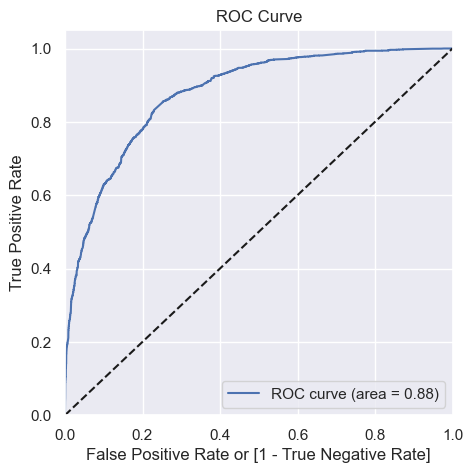

In [122]:
def roc_curve(y_train, y_probs, title='ROC'):

    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(y_train, y_probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()
    
roc_curve(y_train_Predication_final.Converted, y_train_Predication_final.Conversion_Prob, title='ROC Curve')

> Our ROC curve area is 0.88 which means model is good.

In [123]:
# Finding best cutoff through creating various probability cutoff
cutoffs = [float(x)/10 for x in range(10)]

# Create columns with different probability cutoffs
for cutoff in cutoffs:
    name = f'{cutoff:.1f}'  # Use formatted string for column names
    y_train_Predication_final[name] = y_train_Predication_final['Conversion_Prob'].apply(lambda x: 1 if x > cutoff else 0)
    
y_train_Predication_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.119377,4715,0,1,1,0,0,0,0,0,0,0,0
1,1,0.696560,7132,1,1,1,1,1,1,1,1,0,0,0
2,0,0.551310,8954,1,1,1,1,1,1,1,0,0,0,0
3,0,0.113594,5283,0,1,1,0,0,0,0,0,0,0,0
4,0,0.538513,3003,1,1,1,1,1,1,1,0,0,0,0


In [124]:
# Finding the best cutoff through values of sensitivity, accuracy, and specificity for each level of probability
confusion_matrix_table = pd.DataFrame(index=cutoffs, columns=['accuracy', 'sensitivity', 'specificity'])

# Creating values of sensitivity, accuracy, and specificity for each level of probability
for cutoff in cutoffs:
    x = f'{cutoff:.1f}'
    confusion = metrics.confusion_matrix(y_train_Predication_final['Converted'], y_train_Predication_final[x])
    total = sum(sum(confusion))
    
    accuracy = (confusion[0, 0] + confusion[1, 1]) / total
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
    
    confusion_matrix_table.loc[cutoff] = [accuracy, sensitivity, specificity]

confusion_matrix_table.index.name = 'Prob'
confusion_matrix_table.reset_index(inplace=True)

# Display the resulting DataFrame
print(confusion_matrix_table)

   Prob  accuracy sensitivity specificity
0   0.0  0.384045         1.0         0.0
1   0.1   0.61039    0.977456    0.381526
2   0.2  0.733766    0.919887    0.617721
3   0.3   0.78556    0.858293    0.740211
4   0.4  0.793754    0.766908    0.810492
5   0.5  0.792981    0.670692    0.869227
6   0.6  0.791126    0.595008    0.913404
7   0.7  0.771027    0.489533    0.946536
8   0.8   0.74428     0.38124    0.970633
9   0.9  0.702536    0.240741    0.990462


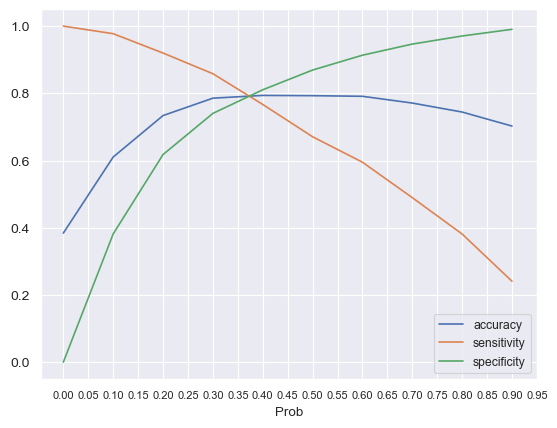

In [125]:
## Plotting Above prob results
sns.set_style("darkgrid")
sns.set_context("paper")
confusion_matrix_table.plot.line(x='Prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.xticks(np.arange(0, 1, step=0.05), size=8)
plt.yticks(size=10)
plt.legend()
plt.show()

### From the curve 37 percent would be good Cutoff Points

In [126]:
y_train_Predication_final['final_predicted'] = y_train_Predication_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_Predication_final.head(5)

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.119377,4715,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.696560,7132,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.551310,8954,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.113594,5283,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.538513,3003,1,1,1,1,1,1,1,0,0,0,0,1


In [127]:
## Checking Accuracy
print("Accuracy :",metrics.accuracy_score(y_train_Predication_final.Converted, y_train_Predication_final.final_predicted))

Accuracy : 0.7922077922077922


In [128]:
# Confusion matrix
Confusion_matrix_2 = metrics.confusion_matrix(y_train_Predication_final.Converted, y_train_Predication_final.final_predicted)
Confusion_matrix_2

array([[3178,  806],
       [ 538, 1946]], dtype=int64)

In [129]:
## Metrics beyond simply accuracy
TP = Confusion_matrix_2[1,1] # true positive 
TN = Confusion_matrix_2[0,0] # true negatives
FP = Confusion_matrix_2[0,1] # false positives
FN = Confusion_matrix_2[1,0] # false negatives

print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))

False Positive Rate : 0.20230923694779115
Positive Predictive Value : 0.7071220930232558
Negative predictive value : 0.8552206673842842
Sensitivity :  0.78341384863124
Specificity :  0.7976907630522089


In [130]:
# Calculate precision
precision = precision_score(y_train_Predication_final.Converted, y_train_Predication_final.final_predicted)

# Calculate recall
recall = recall_score(y_train_Predication_final.Converted, y_train_Predication_final.final_predicted)

print(f'Precision: {precision:.2}')
print(f'Recall: {recall:.2}')

Precision: 0.71
Recall: 0.78


In [131]:
## Providing Lead Score
y_train_Predication_final['Lead_Score'] = y_train_Predication_final.Conversion_Prob.map(lambda x: round(x * 100))
y_train_Predication_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.119377,4715,0,1,1,0,0,0,0,0,0,0,0,0,12
1,1,0.696560,7132,1,1,1,1,1,1,1,1,0,0,0,1,70
2,0,0.551310,8954,1,1,1,1,1,1,1,0,0,0,0,1,55
3,0,0.113594,5283,0,1,1,0,0,0,0,0,0,0,0,0,11
4,0,0.538513,3003,1,1,1,1,1,1,1,0,0,0,0,1,54


## Step-9) Test Predication

In [132]:
X_test = x_test[rfe_support_7]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Others
4608,0,-0.430113,1,0,0,1,0,0,0,0,0,0,0
7935,1,0.805307,1,0,0,0,0,0,0,1,0,1,0
4043,1,-0.886324,1,0,0,0,0,0,1,0,0,1,0
7821,0,-0.300549,1,0,0,1,0,0,1,0,1,0,0
856,0,-0.523180,1,0,0,1,0,0,0,1,0,0,0


In [133]:
# Adding a const
Y = sm.add_constant(X_test)

# Making predictions on the test set
Ytest_predication = testing_model_8.predict(Y)
y_predication = pd.DataFrame(Ytest_predication)
y_predication

,0
4608,0.208419
7935,0.027939
4043,0.008959
7821,0.536071
856,0.066215
...,...
4184,0.413006
5023,0.009275
6661,0.085173
2201,0.041145


In [134]:
# Converting y_test to dataframe
test_df = pd.DataFrame(y_test)
test_df['Prospect ID'] = test_df.index
test_df

,Converted,Prospect ID
4608,1,4608
7935,0,7935
4043,0,4043
7821,0,7821
856,0,856
...,...,...
4184,0,4184
5023,0,5023
6661,0,6661
2201,0,2201


In [135]:
y_predication.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [136]:
# Combining both DataFrame into Final Predication
Final_predication = pd.concat([y_predication,test_df, ],axis=1)

In [137]:
Final_predication.head()

,0,Converted,Prospect ID
0,0.208419,1,4608
1,0.027939,0,7935
2,0.008959,0,4043
3,0.536071,0,7821
4,0.066215,0,856


In [138]:
# Renaming the column 
Final_predication= Final_predication.rename(columns={ 0 : 'Conversion_prob'})
Final_predication = Final_predication.reindex(columns=['Prospect ID','Converted','Conversion_prob'])

## Step-9.1) Evaluation of test data

In [139]:
# Giving Lead Score
Final_predication['Lead_Score'] = Final_predication.Conversion_prob.map(lambda x: round(x * 100))

In [140]:
# Final DataFrame
Final_predication.head()

,Prospect ID,Converted,Conversion_prob,Lead_Score
0,4608,1,0.208419,21
1,7935,0,0.027939,3
2,4043,0,0.008959,1
3,7821,0,0.536071,54
4,856,0,0.066215,7


In [141]:
Final_predication['final_predicted'] = Final_predication.Conversion_prob.map(lambda x: 1 if x > 0.34 else 0)

In [142]:
# Checking accuracy.
print("Accuracy :",metrics.accuracy_score(Final_predication.Converted, Final_predication.final_predicted))

Accuracy : 0.8026695526695526


In [143]:
# confusion matrix
Confusion_matrix_3 = metrics.confusion_matrix(Final_predication.Converted, Final_predication.final_predicted )
Confusion_matrix_3

array([[1325,  370],
       [ 177,  900]], dtype=int64)

In [144]:
## Metrics beyond simply accuracy
TP = Confusion_matrix_3[1,1] # true positive 
TN = Confusion_matrix_3[0,0] # true negatives
FP = Confusion_matrix_3[0,1] # false positives
FN = Confusion_matrix_3[1,0] # false negatives

print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))

False Positive Rate : 0.2182890855457227
Positive Predictive Value : 0.7086614173228346
Negative predictive value : 0.8821571238348869
Sensitivity :  0.8356545961002786
Specificity :  0.7817109144542773


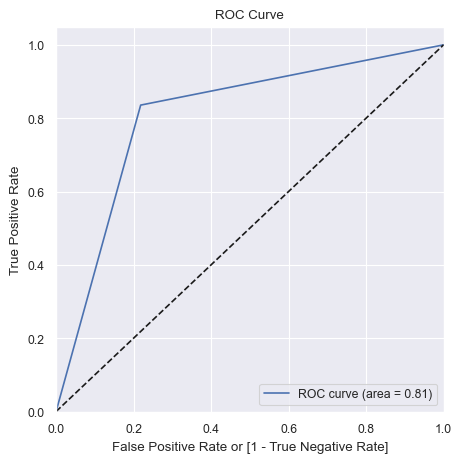

In [145]:
def roc_curve(y_train, y_probs, title='ROC'):

    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(y_train, y_probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()
    
roc_curve(Final_predication.Converted, Final_predication.final_predicted, title='ROC Curve')

## Step-10 ) Comparsion Results

In [146]:
# Checking accuracy.
print('Accuracy of Train Data :',metrics.accuracy_score( y_train_Predication_final['Predicted'],y_train_Predication_final.Converted))
print("Accuracy of Test Data :",metrics.accuracy_score(Final_predication.Converted, Final_predication.final_predicted))

Accuracy of Train Data : 0.7929808286951144
Accuracy of Test Data : 0.8026695526695526


## Train Data
Sensitivity :  0.78341384863124

Specificity :  0.7976907630522089
    
## Test Data
Sensitivity :  0.8356545961002786

Specificity :  0.7817109144542773

## Few Points for Sales Team derived from Datasets

In [147]:
print(f'The Sales team should Focus upon these Parameters:\n\n{testing_model_8.params.sort_values(ascending=False)}')

The Sales team should Focus upon these Parameters:

Lead Source_Reference                                   2.513925
What is your current occupation_Working Professional    2.103327
Last Activity_SMS Sent                                  1.627633
Last Notable Activity_Others                            1.487632
Total Time Spent on Website                             0.963443
Lead Source_Olark Chat                                  0.587024
Last Activity_Email Opened                              0.324535
const                                                  -0.081139
Last Notable Activity_Modified                         -0.529535
Last Activity_Olark Chat Conversation                  -0.743824
Specialization_Others                                  -0.749136
Lead Origin_Landing Page Submission                    -1.163487
What is your current occupation_Other                  -1.222187
Do Not Email                                           -1.328931
dtype: float64


In [148]:
Should_contact_them = Final_predication.loc[Final_predication["Lead_Score"] >= 85, "Prospect ID"].values
print(f"The Sales team should contact these Prospect IDs:\n\n{', '.join(map(str, Should_contact_them))}")

The Sales team should contact these Prospect IDs:

318, 1570, 8086, 1840, 6157, 8030, 1568, 4816, 3290, 1561, 7042, 5505, 7840, 6501, 8687, 3698, 3721, 8068, 8504, 6119, 9107, 4157, 4949, 7250, 6874, 6712, 6866, 4123, 7719, 5470, 1730, 7636, 2273, 5509, 2067, 8184, 2870, 8282, 3033, 88, 3937, 2018, 1199, 6977, 1559, 1263, 4313, 2729, 5559, 4252, 6666, 1803, 1897, 2614, 5363, 267, 4002, 5395, 7448, 6126, 2473, 7548, 3482, 2760, 3723, 6663, 8499, 9108, 2127, 4387, 3123, 3761, 5474, 2673, 8946, 1557, 9043, 7503, 212, 7653, 7082, 1406, 4453, 6728, 4734, 2115, 967, 5167, 6170, 4890, 8113, 7853, 2835, 2519, 2680, 8749, 4607, 4772, 5817, 5206, 6754, 9233, 6755, 4250, 6811, 1617, 3532, 2955, 4992, 8052, 7127, 5159, 6092, 7733, 2812, 8197, 1112, 6486, 5414, 5266, 3307, 2128, 2392, 2543, 5804, 1737, 7174, 7236, 2826, 1068, 4028, 7053, 4625, 2145, 3299, 7159, 4241, 3064, 2114, 7470, 3165, 1022, 8648, 6931, 8843, 7191, 4900, 1747, 4050, 9154, 7417, 8804, 4851, 1287, 7495, 718, 1470, 4803, 9044, 64